# Percentaje of Infected Population in Spain

First we import all the libraries to use for our data analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

We filter data given a specific country. So that it is easier to handle.

In [2]:
data = pd.read_csv("data/covid-worldwide.csv")
# interestCountry = input("Please enter a country name\n")
interestCountry = "Spain"
filteredData = data[data["Country/Region"] == interestCountry]
print(filteredData.head())

     Province/State Country/Region   Lat  Long        Date  Confirmed  \
2880            NaN          Spain  40.0  -4.0  2020-01-22          0   
2881            NaN          Spain  40.0  -4.0  2020-01-23          0   
2882            NaN          Spain  40.0  -4.0  2020-01-24          0   
2883            NaN          Spain  40.0  -4.0  2020-01-25          0   
2884            NaN          Spain  40.0  -4.0  2020-01-26          0   

      Recovered  Deaths  
2880          0       0  
2881          0       0  
2882          0       0  
2883          0       0  
2884          0       0  


Now, we proceed to sort data so that it is easily handled to be plotted in a matplotlib chart. We start by retrieving the sick population.

In [3]:
# Set the variable for the population size of the selected country
# popSize = input("introduce the population size for your country")
popSize = 46.66 * 10e6

confirmedCases = [row['Confirmed']/popSize for _, row in filteredData.iterrows()]
recoveredCases = [row['Recovered']/popSize for _, row in filteredData.iterrows()]
deathCases = [row['Deaths']/popSize for _, row in filteredData.iterrows()]
dates = [datetime.datetime.strptime(row['Date'], "%Y-%m-%d") for _, row in filteredData.iterrows()]

#confirmedCasesRate = [ row['Confirmed']/filteredData[i-1]['Confirmed'] if i != 0 else 0  for i, row in filteredData.iterrows()]
previousData = 0
ccR = []
for i, row in filteredData.iterrows():
    if row['Confirmed'] != 0.0:
        if previousData == 0.0:
            ccR.append(1.0)
        else:   
            ccR.append(row['Confirmed']/previousData)
        previousData = row['Confirmed']
    else:
        ccR.append(1.0)

        

## Confirmed Cases
The following plot shows the accounted number of confirmed cases as a percentage of the population, were the exponential rate of the virus spread is shown. 

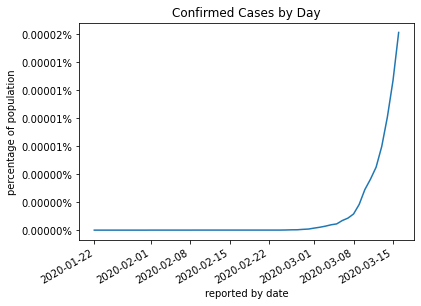

In [4]:
# beautify the Plot
fig, ax = plt.subplots()
ax.plot(dates,confirmedCases)
ax.set_title("Confirmed Cases by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

## Rate of Growth by Day

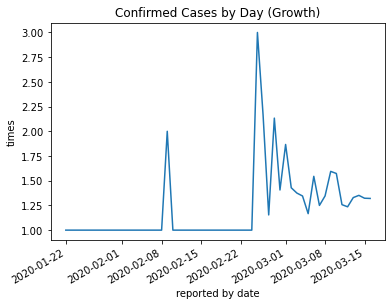

In [5]:
fig, ax = plt.subplots()
ax.plot(dates, ccR)
ax.set_title("Confirmed Cases by Day (Growth)")
ax.set_xlabel("reported by date")
ax.set_ylabel("times")
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

The maximum rate of new confirmed cases ocurred between March 23rd and the 24th reaching a massive 3x, after this time the rate seemed to continiously decrease over time, perhaps by government lockdown instructions. Confirmation on the factors that cause the decrease in the rate change will be discussed later.

## Recovered Cases

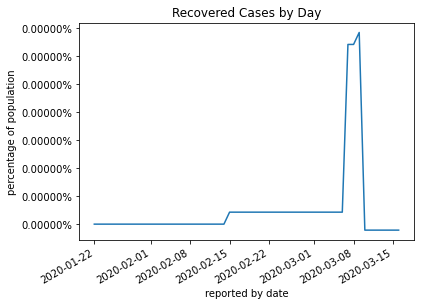

In [6]:
fig, ax = plt.subplots()
ax.plot(dates,recoveredCases)
ax.set_title("Recovered Cases by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

## Cases Resulting in Death

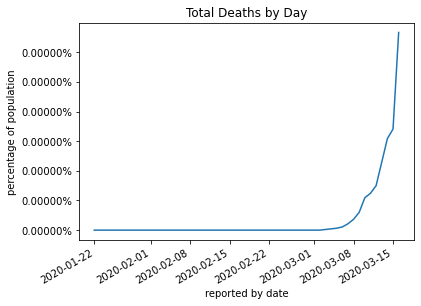

In [7]:
fig, ax = plt.subplots()
ax.plot(dates, deathCases)
ax.set_title("Total Deaths by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()